In [61]:
# importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load dataset
data=pd.read_excel(r"C:\Users\user\Downloads\DataAnalyst_Assesment_Dataset.xlsx")

In [6]:
# Load first five rows
data.head(5)

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,NaN,NaN,10:00:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,NaN,NaN,11:00:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,NaN,NaN,12:00:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,NaN,15:00:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794


In [7]:
# total rows ad columns
data.shape

(1000, 18)

In [8]:
# Display dataset information, including column names, data types, non-null counts,helps in identifying missing values and understanding data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking ID         1000 non-null   object        
 1   Customer ID        1000 non-null   object        
 2   Customer Name      1000 non-null   object        
 3   Booking Type       1000 non-null   object        
 4   Booking Date       1000 non-null   datetime64[ns]
 5   Status             1000 non-null   object        
 6   Class Type         328 non-null    object        
 7   Instructor         270 non-null    object        
 8   Time Slot          795 non-null    object        
 9   Duration (mins)    795 non-null    float64       
 10  Price              1000 non-null   float64       
 11  Facility           672 non-null    object        
 12  Theme              273 non-null    object        
 13  Subscription Type  0 non-null      float64       
 14  Service N

In [25]:
# Provides insights into mean, median, min, max, and distribution of values
data.describe()

,Booking Date,Duration (mins),Price,Subscription Type
count,1000,795.000000,1000.000000,0.0
mean,2025-05-07 17:08:09.600000256,84.415094,157.765660,NaN
min,2025-03-25 00:00:00,45.000000,15.250000,NaN
25%,2025-04-14 00:00:00,45.000000,97.165000,NaN
50%,2025-05-08 00:00:00,90.000000,159.030000,NaN
75%,2025-05-31 00:00:00,120.000000,219.897500,NaN
max,2025-06-22 00:00:00,120.000000,299.760000,NaN
std,NaN,30.383838,77.317254,NaN


The dataset contains 1,000 bookings with details on dates, durations, and prices. Booking dates range from March 25 to June 22, 2025, with most occurring between April 14 and May 31.

Booking durations vary between 45 and 120 minutes, with an average of 84.4 minutes. The most common durations are 45, 90, and 120 minutes.

Prices range from 0 to 299.76, with an average of 139.47. The 25th percentile is 58.09, the median is 137.35, and the 75th percentile is 219.89, showing significant price variation.

The Subscription Type column was empty 

Key insights:

Most bookings are 90 to 120 minutes long.

Prices vary widely, with some free and others up to 300.

In [28]:
# to check Null values
data.isnull().sum()

Booking ID              0
Customer ID             0
Customer Name           0
Booking Type            0
Booking Date            0
Status                  0
Class Type              0
Instructor              0
Time Slot             205
Duration (mins)       205
Price                   0
Facility                0
Theme                   0
Subscription Type    1000
Service Name            0
Service Type            0
Customer Email          0
Customer Phone          0
dtype: int64

In [30]:
data.drop("Subscription Type",axis=1,inplace=True) # Subscription Type column is empty so Dropping is better

In [32]:
# to view the percentage of Null values
data.isnull().mean() * 100

Booking ID          0.0
Customer ID         0.0
Customer Name       0.0
Booking Type        0.0
Booking Date        0.0
Status              0.0
Class Type          0.0
Instructor          0.0
Time Slot          20.5
Duration (mins)    20.5
Price               0.0
Facility            0.0
Theme               0.0
Service Name        0.0
Service Type        0.0
Customer Email      0.0
Customer Phone      0.0
dtype: float64

In [34]:
data["Class Type"].fillna("Not Applicable",inplace=True)
data["Instructor"].fillna("Not Assigned",inplace=True)
data["Theme"].fillna("General",inplace=True)
data["Customer Email"].fillna("Not Available",inplace=True)
data["Customer Phone"].fillna("Not Available",inplace=True)
data["Facility"].fillna("Unspecified",inplace=True)

# All these columns have blank values, some have more than 70% ,instead of dropping the column giving a specific value to the blank areas,it will helps in analyzing the dataset.

C:\Users\user\AppData\Local\Temp\ipykernel_7688\1195601147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Class Type"].fillna("Not Applicable",inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7688\1195601147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [36]:
# Giving random Time slots and Durations to Blank areas
available_time_slots = ["09:00:00", "10:00:00", "11:00:00", "12:00:00", "13:00:00", 
                        "14:00:00", "15:00:00", "16:00:00", "17:00:00"]
available_durations = [120, 45, 90]
missing_slots=data["Time Slot"].isnull().sum()
missing_durations=data["Duration (mins)"].isnull().sum()

In [38]:
missing_slots = data["Time Slot"].isnull().sum()
missing_durations = data["Duration (mins)"].isnull().sum()
data.loc[data["Time Slot"].isnull(), "Time Slot"] = np.random.choice(available_time_slots, size=missing_slots, replace=True)
data.loc[data["Duration (mins)"].isnull(), "Duration (mins)"] = np.random.choice(available_durations, size=missing_durations, replace=True)

In [40]:
# Using Median in Price column to get a balanced price distribution in Empty value fields 
median_price = data.loc[data["Price"] > 0, "Price"].median()
data["Price"] = data["Price"].replace(0, median_price)


In [42]:
# 0 Null Values
data.isnull().sum()

Booking ID         0
Customer ID        0
Customer Name      0
Booking Type       0
Booking Date       0
Status             0
Class Type         0
Instructor         0
Time Slot          0
Duration (mins)    0
Price              0
Facility           0
Theme              0
Service Name       0
Service Type       0
Customer Email     0
Customer Phone     0
dtype: int64

In [44]:
# checking the data
data

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,Not Applicable,Not Assigned,10:00:00,90.0,42.74,Party Room,General,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,Not Applicable,Not Assigned,11:00:00,90.0,182.06,Party Room,Superhero,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,Not Applicable,Not Assigned,11:00:00,120.0,207.50,Play Area,General,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,Not Applicable,Not Assigned,12:00:00,90.0,203.20,Play Area,General,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,Not Assigned,15:00:00,120.0,161.14,Unspecified,General,Art,Class,customer5@example.com,001-718-3794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b45c041f-6199-4a53-8841-1afd696d8c2d,ea4a4b7e-aad1-4ac5-9cb3-3a7c10a38819,Customer 996,Birthday Party,2025-05-04,Confirmed,Not Applicable,Not Assigned,17:00:00,120.0,104.83,Party Room,Princess,Party Room,Birthday Party,customer996@example.com,001-522-8955
996,633d1590-d9b2-4263-9b29-8589333c7a0a,10cd8264-a18b-4ee4-a035-27058df83238,Customer 997,Class,2025-05-02,Confirmed,Art,James Howard,16:00:00,90.0,119.02,Unspecified,General,Art,Class,customer997@example.com,Not Available
997,c552c1b5-bb2e-46a5-b5c9-43101cf39133,623b4030-64c5-46ae-935f-fd9c3beea824,Customer 998,Facility,2025-04-04,Confirmed,Not Applicable,Not Assigned,17:00:00,120.0,172.84,Party Room,General,Party Room,Facility,customer998@example.com,001-391-4565
998,09fb0473-56cc-4624-9c5a-e9cd152acc41,e483e86a-cc2c-4a49-86ef-b7a0c1b6fd7b,Customer 999,Facility,2025-05-11,Pending,Not Applicable,Not Assigned,12:00:00,120.0,275.18,Party Room,General,Party Room,Facility,customer999@example.com,001-668-6307


# Exploratory Data Analysis(EDA)

## Price Distribution

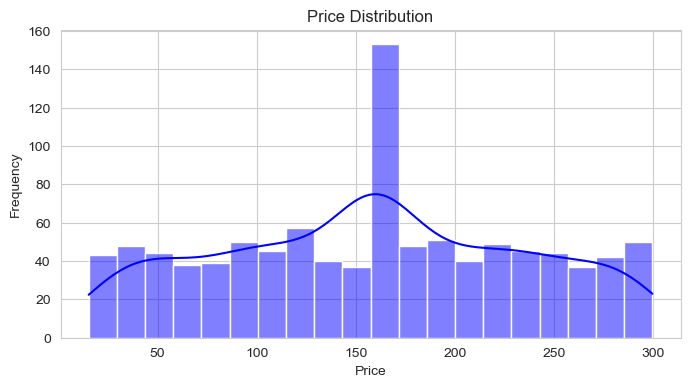

In [81]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(data["Price"], bins=20, kde=True, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

This histogram provides Price Distribution insights into the pricing structure of bookings. The X-axis represents the price range, while the Y-axis shows the frequencies. A noticeable peak is observed around the 150, indicating that most bookings are priced in this range. The KDE (Kernel Density Estimate) curve overlays the histogram to show the probability distribution, highlighting variations in pricing.

## Duration Distribution

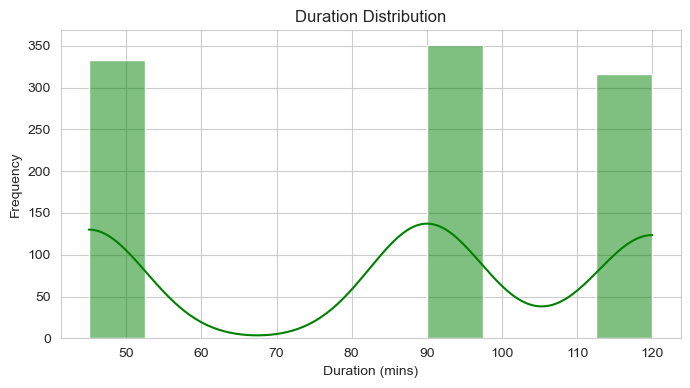

In [88]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Duration (mins)"], bins=10, kde=True, color="green")
plt.title("Duration Distribution")
plt.xlabel("Duration (mins)")
plt.ylabel("Frequency")
plt.show()

This histogram shows the distribution of booking durations in minutes. The dataset includes durations of 45, 90, and 120 minutes which appear as distinct peaks. This indicates that bookings are mostly standardized to these fixed durations, with 90 minutes being the most frequent choice. The KDE curve further emphasizes the density of duration preferences among customers.

## Booking Status Distribution

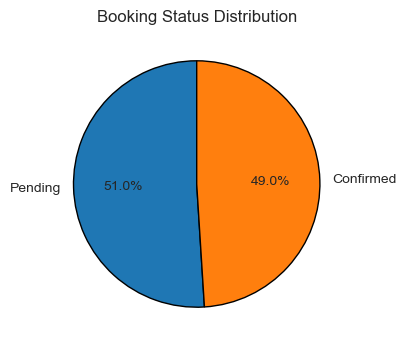

In [110]:
#pie chart
plt.figure(figsize=(4, 4))
data["Status"].value_counts().plot.pie(
    autopct="%1.1f%%", 
    colors=["#1f77b4", "#ff7f0e"], 
    startangle=90, 
    wedgeprops={"edgecolor": "black"}
)
plt.title("Booking Status Distribution")
plt.ylabel("")  # Removing y-label for clarity
plt.show()

The pie chart illustrates the  booking statuses, distinguishing between Pending and Confirmed bookings.
Pending Bookings (51%): These bookings are yet to be confirmed, possibly due to payment issues or customer indecision.
Confirmed Bookings (49%): These bookings are successfully finalized, indicating a near 50-50 split between confirmed and pending bookings.

 ## Booking Type Distribution

C:\Users\user\AppData\Local\Temp\ipykernel_7688\3187897599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Booking Type", palette="coolwarm")


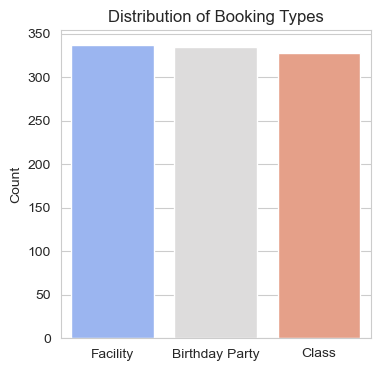

In [108]:
#Bar Plot
plt.figure(figsize=(4, 4))
sns.countplot(data=data, x="Booking Type", palette="coolwarm")
plt.xlabel(" ")
plt.ylabel("Count")

plt.title("Distribution of Booking Types")
plt.show()

The bar chart above represents the distribution of different booking types in the dataset. The three categories Facility, Birthday Party, and Class are almost evenly distributed, with a slight variation in their counts.

Facility bookings have the highest count, indicating a strong preference for this type of service.

Birthday Party bookings follow closely, suggesting that event-based reservations are popular.

Class bookings are slightly lower but still a significant portion of the total bookings.

## Revenue Distribution by Booking Type

C:\Users\user\AppData\Local\Temp\ipykernel_7688\330853425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x="Booking Type",y="Price",estimator=sum, palette="pastel")


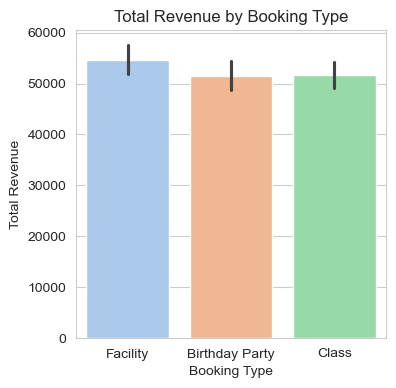

In [118]:
# Bar Plot
plt.figure(figsize = (4,4))
sns.barplot(data=data,x="Booking Type",y="Price",estimator=sum, palette="pastel")
plt.title("Total Revenue by Booking Type")
plt.xlabel("Booking Type")
plt.ylabel("Total Revenue")
plt.show()

This visualization shows the total revenue generated by each booking type (Facility, Birthday Party, and Class). The Facility bookings generate the highest revenue, followed closely by Birthday Party and Class bookings. The error bars indicate some variability in revenue, suggesting different pricing structures or durations may impact earnings.

## Total Revenue by Facility

C:\Users\user\AppData\Local\Temp\ipykernel_7688\1205663783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Facility"],y=data["Price"],estimator= sum, palette="pastel")


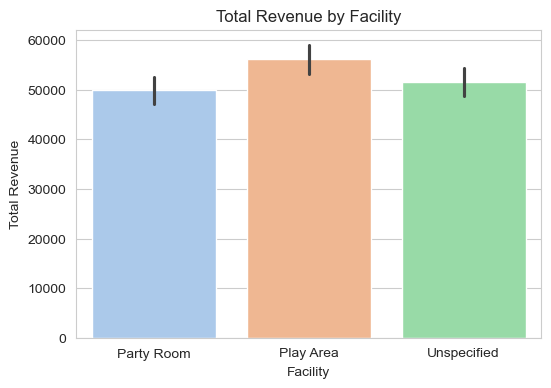

In [138]:
plt.figure(figsize=(6,4))
sns.barplot(x=data["Facility"],y=data["Price"],estimator= sum, palette="pastel")
plt.title("Total Revenue by Facility")
plt.xlabel("Facility")
plt.ylabel("Total Revenue")
plt.show()


This bar chart represents the total revenue generated by different facilities. The Play Area has the highest revenue, followed by Unspecified and Party Room. The variation in revenue suggests that the Play Area is the most profitable facility, potentially due to higher demand or pricing. The error bars indicate a small margin of uncertainty in revenue distribution.    


## Bookings by Time Slot

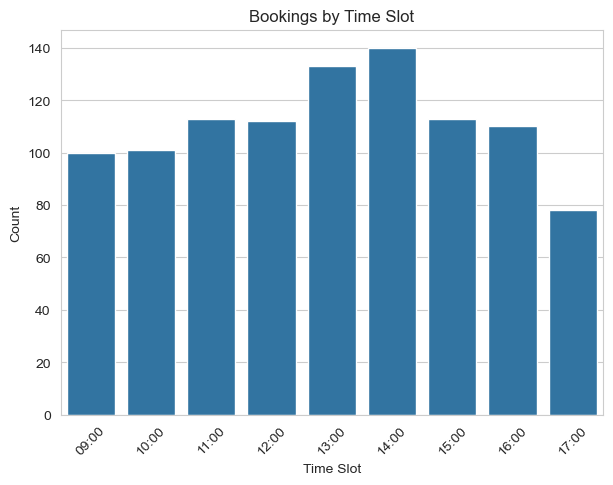

In [200]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='Time Slot', order=sorted(data['Time Slot'].unique()))
plt.xticks(rotation=45)
plt.title("Bookings by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Count")
plt.show()
data['Time Slot'] = data['Time Slot'].astype(str).str.slice(0, 5)# Converting all time slots to a uniform string format "HH:MM"


Peak Booking Hours: 13:00 and 14:00 have the highest number of bookings.

Steady Demand: 10:00 - 12:00 and 15:00 - 16:00 have moderate bookings.

Lowest Booking Slot: 17:00 has the fewest bookings.

## Daily Revenue Trend Chart

For analysing peaks!!!!

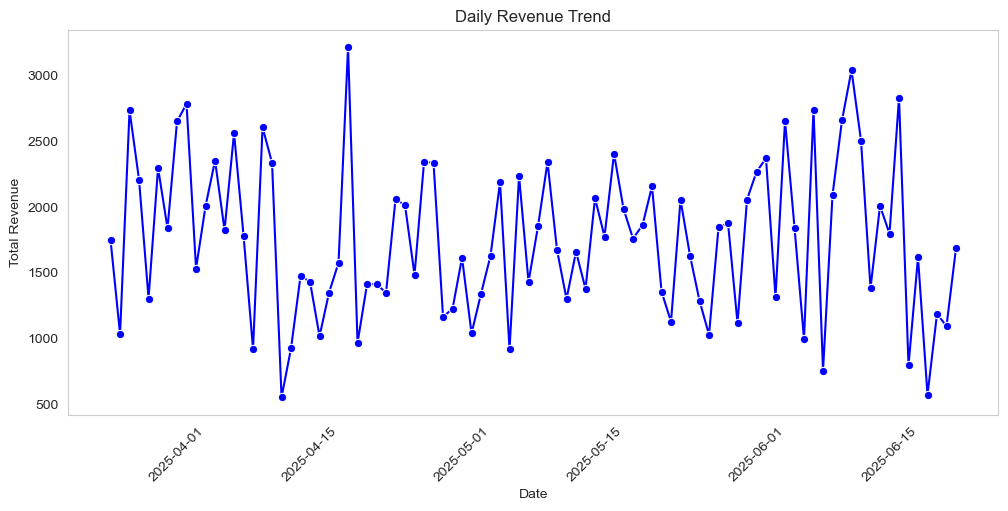

In [193]:
# Plot line chart
data['Booking Date'] = pd.to_datetime(data['Booking Date'])

# Aggregate revenue by day
daily_revenue = data.groupby('Booking Date')['Price'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='Booking Date', y='Price', data=daily_revenue, marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()


The chart visualizes the total daily revenue over a period, showing fluctuations in business performance. The x-axis represents dates, while the y-axis indicates total revenue. The blue line with markers highlights revenue changes over time.

There are frequent revenue fluctuations, with some days showing sharp spikes and others declining.

The highest peak occurs around mid-April, suggesting a seasonal demand or special event.

Early April and August have high volatility, indicating dynamic business activity.

Some low-revenue days might be due to weekends, holidays, or decreased customer demand.